# Digit Recognizer using Keras

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

In [2]:
import pandas as pd
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


from sklearn.preprocessing import OneHotEncoder

Using TensorFlow backend.


# Read Train and Test Files using Pandas Library

In [3]:
train = pd.read_csv("F:\\Kaggle_competition\\train.csv")
test = pd.read_csv("F:\\Kaggle_competition\\test.csv")
train.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

# Print First 5 Rows 

In [4]:
train.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Finding Dependent and Independent Variabels

In [5]:
Y_train = train["label"]
X_train = train.drop(['label'], axis = 1)

X_train.shape
Y_train.shape

(42000, 784)

(42000,)

# Checking Null Values

In [6]:
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

# Converting Label Value 2 -> [0,0,1,0,0,0,0,0,0,0] using OneHotEncoder

In [7]:
enc = OneHotEncoder(handle_unknown='ignore')
Y_train = np.asarray(Y_train)
Y_train

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

# Reshape X_train as (height = 28px, width = 28px , canal = 1)

In [8]:
X_train = X_train / 255.0
X_train = np.asarray(X_train)
X_train = X_train.reshape(X_train.shape[0],28,28,1)

# Keras Model

In [9]:
model  = keras.Sequential([keras.layers.Flatten(),
                            keras.layers.Dense(784,activation=tf.nn.relu),
                             keras.layers.Dense(10, activation=tf.nn.softmax)
                                                ])

In [10]:
model.compile(optimizer=tf.train.AdamOptimizer(), loss = 'sparse_categorical_crossentropy')

In [11]:
model.fit(X_train, Y_train.ravel(), epochs=25, batch_size=50)

Epoch 1/25
42000/42000 [==============================] - 14s 334us/step - loss: 0.2328
Epoch 2/25
42000/42000 [==============================] - 11s 255us/step - loss: 0.0932
Epoch 3/25
42000/42000 [==============================] - 11s 271us/step - loss: 0.0580
Epoch 4/25
42000/42000 [==============================] - 11s 268us/step - loss: 0.0385
Epoch 5/25
42000/42000 [==============================] - 11s 252us/step - loss: 0.0273
Epoch 6/25
42000/42000 [==============================] - 11s 267us/step - loss: 0.0187
Epoch 7/25
42000/42000 [==============================] - 11s 265us/step - loss: 0.0166
Epoch 8/25
42000/42000 [==============================] - 11s 261us/step - loss: 0.0136
Epoch 9/25
42000/42000 [==============================] - 11s 264us/step - loss: 0.0121
Epoch 10/25
42000/42000 [==============================] - 11s 266us/step - loss: 0.0084
Epoch 11/25
42000/42000 [==============================] - 11s 257us/step - loss: 0.0101
Epoch 12/25
42000/42000 [=====

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


# Reshaping test as (height = 28px, width = 28px , canal = 1)

In [13]:
test = test / 255.0
test = np.asarray(test)
test = test.reshape(test.shape[0],28,28,1)

# Predicting Test Values using Keras Model 

In [14]:
results = model.predict(test)

# Retrieving argmax Values

In [15]:
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")

# Plotting the Predicted and actual labels

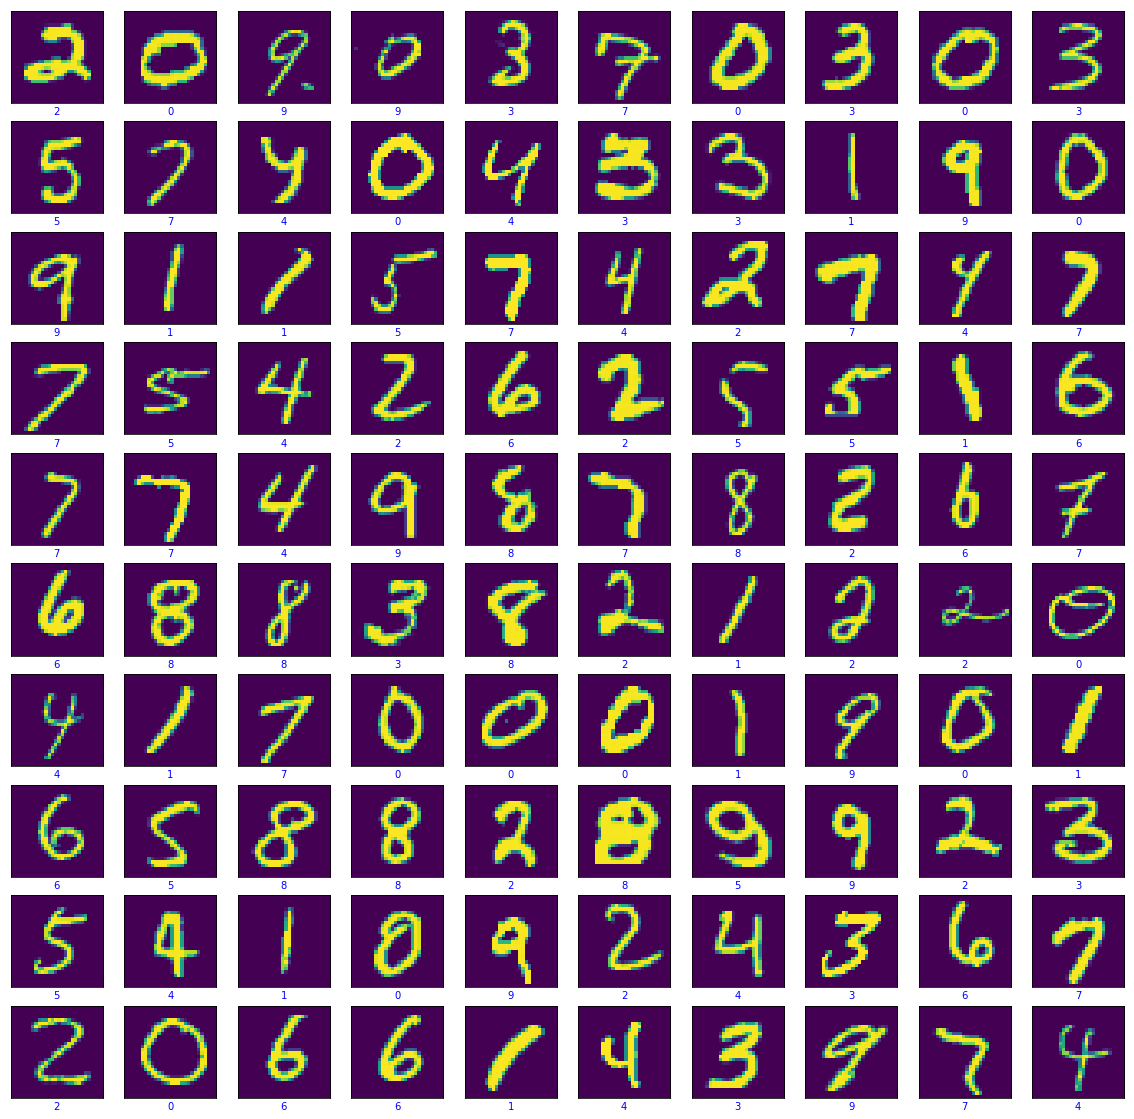

In [24]:
_=plt.figure(figsize=(20,20))
for i in range(100):
    _=plt.subplot(10,10,i+1)
    _=plt.xticks([])
    _=plt.yticks([])
    _= plt.imshow(test[i][:,:,0])
    _=plt.xlabel("{}".format(results[i]), color = 'blue')

In [16]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("F:\\Kaggle_competition\\cnn_mnist_datagen.csv",index=False)